In [151]:
import os
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# Read Files

In [2]:
from os import walk

mypath = 'binary/binary'

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

# Count Length

In [4]:
# Read Files
files_lens = []

for file in filenames:
    #print(mypath +'/' + file)
    
    curr_file = open(mypath +'//' + file)
    
    # analyze file
    len_line = len(curr_file.readlines())

    
        
        
    files_lens.append(len_line)

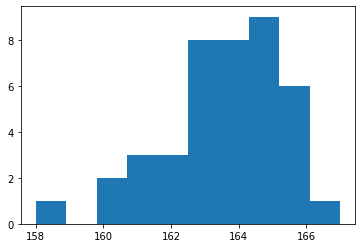

In [5]:
import matplotlib.pyplot as plt

plot = plt.hist(files_lens, bins=10)

# merge

In [128]:
def extract_X_y_from_file(array, X_num, y_num):
    X = []
    y = []
    
    iterations = len(array)
    for i in range(iterations):
        # check if we reach to end
        if i+X_num + y_num > len(array):
            break
            
        # calculate X,y
        X_temp = array[i: i+X_num]
        y_temp = array[i+X_num: i+X_num + y_num]
        
        
        # append
        X.append(X_temp)
        y.append(y_temp)        
        
    return X,y

In [135]:
X_num = 25
y_num = 5
def create_data(X_num = 30, y_num = 5, mypath = 'binary/binary'):
    all_X = []
    all_y = []
    
    
    # find files in path
    f = []
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(filenames)
        break
        
    # iterate and analyze file
    for j,file in enumerate(filenames):
        # temp path
        path = mypath +'//' + file

        # read csv
        df = pd.read_csv(path)
        df = df.drop('Time',axis=1)

        # convert to list
        array = df.values.tolist()

        # create X and y
        X,y = extract_X_y_from_file(array, X_num, y_num)

        # add to final data
        all_X = all_X + X
        all_y = all_y + y

    return all_X, all_y

In [136]:
all_X, all_y = create_data()

In [137]:
len(all_X)

5276

In [152]:
model = Sequential()
model.add(LSTM(50, activation='relu',  return_sequences=True, input_shape=(9, 30)))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(9))
# model.compile(optimizer='adam', loss='mse')
# model.summary()

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'